In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 93.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import os
import boto3

In [3]:
BASE_MODEL_PATH = "models/model.pt"
NEW_MODEL_PATH = "models/new-model.pt"

AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
AWS_S3_BUCKET = os.environ.get("AWS_S3_BUCKET")
AWS_S3_ENDPOINT = os.environ.get("AWS_S3_ENDPOINT")

In [4]:
session = boto3.Session(
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)
client = session.client("s3", endpoint_url=AWS_S3_ENDPOINT)

In [5]:
client.download_file(AWS_S3_BUCKET, BASE_MODEL_PATH, "/tmp/base-model.pt")
client.download_file(AWS_S3_BUCKET, NEW_MODEL_PATH, "/tmp/new-model.pt")

In [6]:
model = YOLO("/tmp/base-model.pt")
results = model.val(data = "utils/dataset.yaml")

Ultralytics 8.3.145 🚀 Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA RTX A2000 12GB, 12032MiB)
YOLOv8n-c3k2-2222-0.25-True-C2PSA-6 summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 356.4±35.3 MB/s, size: 535.5 KB)


val: Scanning /opt/app-root/src/ai-demo/dataset/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


                   all         31         48      0.151      0.272      0.108     0.0701
                person         21         23    0.00155      0.304    0.00101    0.00059
               bicycle         25         25        0.3       0.24      0.214       0.14
Speed: 0.5ms preprocess, 9.2ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val


100%|██████████| 130k/130k [00:00<00:00, 2.52MB/s]

image 1/1 /opt/app-root/src/ai-demo/2164077239.0.jpg: 448x640 4 persons, 1 sports ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


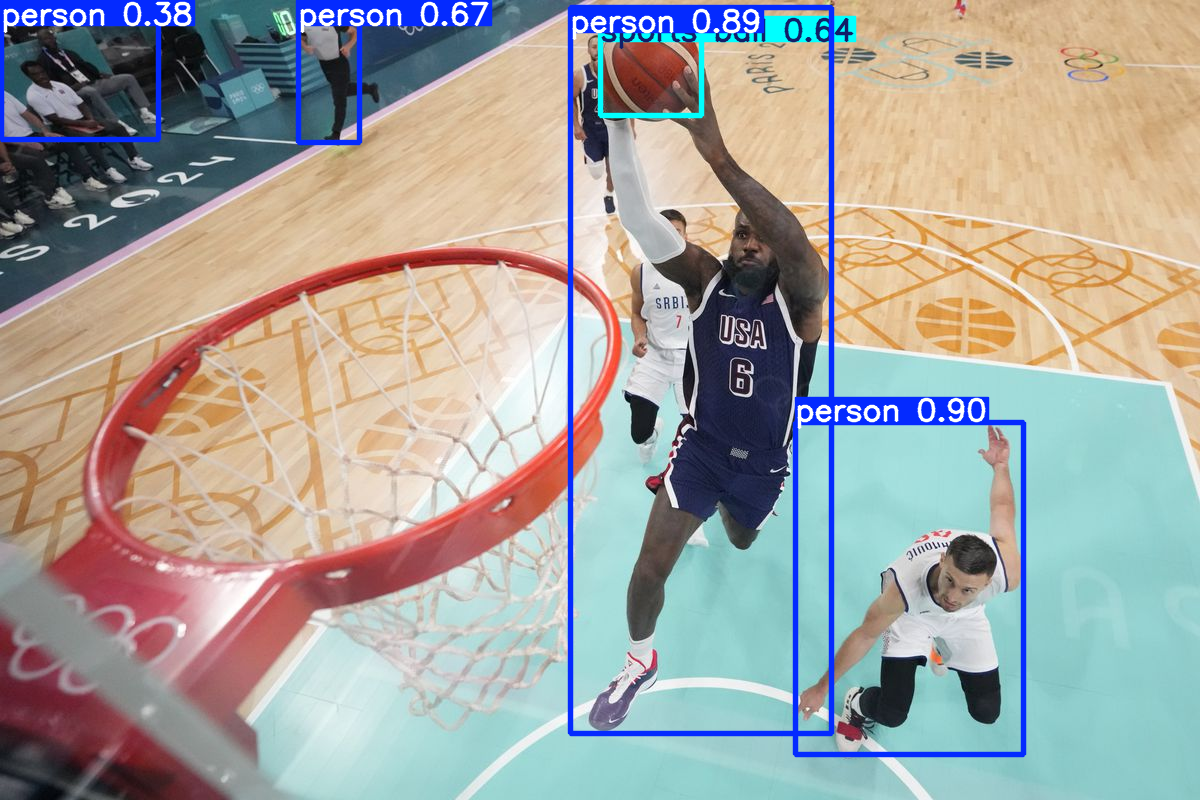

In [7]:
res = model("https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg")
res[0].show()

In [8]:
model = YOLO("/tmp/new-model.pt")
results = model.val(data = "utils/dataset.yaml")

Ultralytics 8.3.145 🚀 Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA RTX A2000 12GB, 12032MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8255.6±1249.5 MB/s, size: 638.4 KB)


val: Scanning /opt/app-root/src/ai-demo/dataset/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


                   all         31         48      0.953      0.892      0.914      0.761
                  Ball         21         23      0.905      0.829      0.847      0.716
                  Hoop         25         25          1      0.956      0.981      0.806
Speed: 3.2ms preprocess, 12.2ms inference, 0.0ms loss, 19.9ms postprocess per image
Results saved to runs/detect/val2



Found https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg locally at 2164077239.0.jpg
image 1/1 /opt/app-root/src/ai-demo/2164077239.0.jpg: 448x640 1 Hoop, 10.4ms
Speed: 0.9ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


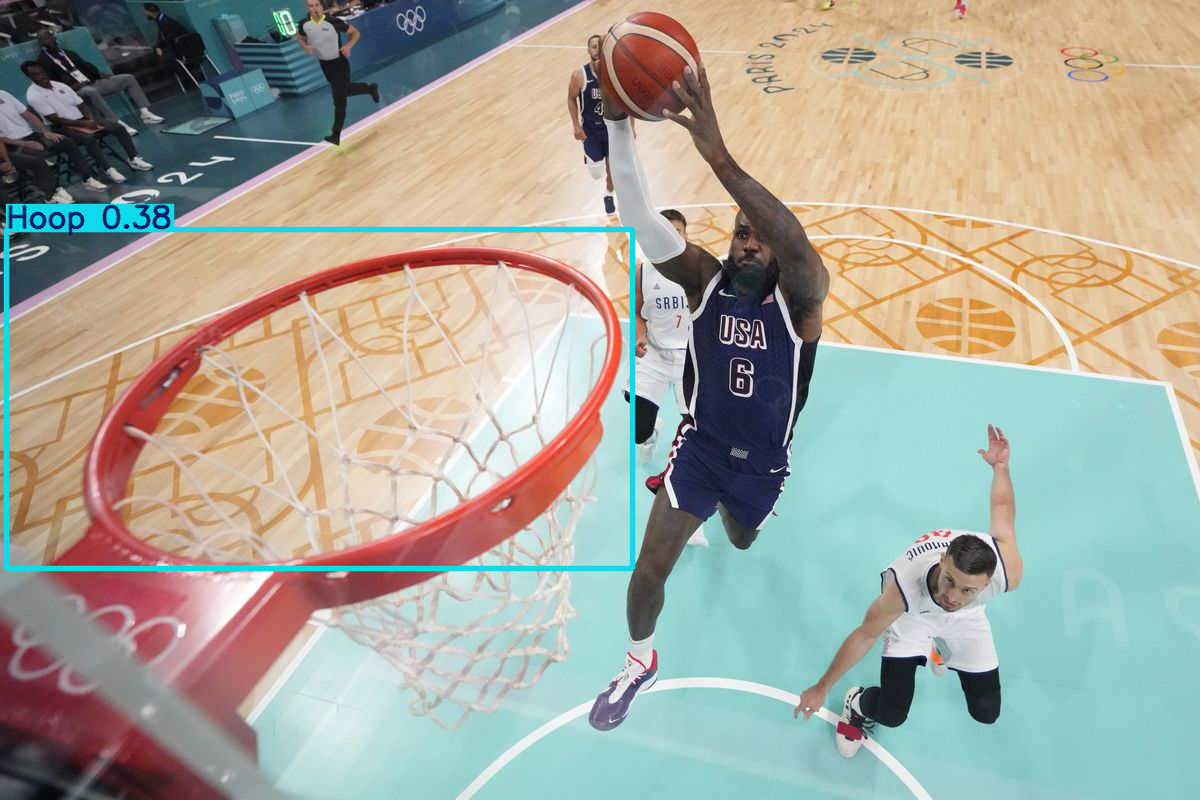

In [9]:
res = model("https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg")
res[0].show()